In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
#importing golden standard data
df = pd.read_excel('gold_standard.xlsx', header=0)
df

,DOI,Original Text,Base,Dopant,Dopant Category,StartingTemp,Primary Ramp Time,Primary Melt Temp,Primary Melt Time,Secondary Ramp Time,...,Anneal Temp,Anneal Time,Cooling type,Densification Technique,Densification Time,Densification Temp,Densification Pressure,Post Annealing Temp,Post Annealing Time,Pure Phase
0,10.1016/j.jpcs.2015.03.012,Polycrystalline samples of the composition Cu1...,CuInTe2,Ni,n-type,298,0.000,1273,2,10.000,...,923,168,room cooling,Hot Press,60,823.00,70,773,120,0
1,10.1063/1.4931600,Polycrystalline samples of the composition CuI...,CuInTe2,Hg,p-type,298,0.000,298,0,10.000,...,923,168,room cooling,Hot Press,60,673.00,70,0,0,0
2,10.1063/1.4726109,"The ingots CuGa1-InxTe2 (x = 0, 0.36, 0.64, an...",CuInTe2,Ga,p-type,298,0.000,298,0,17.910,...,663,24,room cooling,NIL,0,0.00,0,0,0,1
3,10.1016/j.jallcom.2015.01.043,Samples were synthesized by reacting raw start...,CuInTe2,Zn,n-type,298,0.000,298,0,15.000,...,873,24,quenched,Hot Press,15,748.15,90,0,0,1
4,10.1016/j.jallcom.2015.01.043,Samples were synthesized by reacting raw start...,CuInTe2,Ga,isovalent,298,0.000,298,0,15.000,...,873,24,quenched,Hot Press,15,748.15,90,0,0,1
5,10.1007/s40195-015-0233-9,"Polycrystalline CuIn(SexTe1-x)2, where x = 0.1...",CuInTe2,Se,isovalent,298,2.180,523,3,3.330,...,300,0,quenched,NIL,0,0.00,0,0,0,0
6,10.7567/JJAP.53.05FW07,"The (CuIn)1-xZn2xSe2 (x= 0.0, 0.1, 0.2, 0.3, 0...",CuInSe2,Zn,p-type,298,0.000,298,0,9.583,...,300,0,furnace cooling,NIL,0,0.00,0,0,0,0
7,10.1002/pssa.201000074,"The series of compounds Cu1+xIn1-xSe2(x = 0, 0...",CuInSe2,-,intrinsic doping,298,0.000,298,0,8.940,...,873,1,furnace cooling,NIL,0,0.00,0,873,1,0
8,10.1557/jmr.2011.63,Cu–In–Se compounds were prepared by mechanoche...,CuInSe (multiple),-,intrinsic doping,298,0.000,298,0,7.916,...,300,0,furnace cooling,NIL,0,0.00,0,0,0,0
9,10.1021/cm902795e,Samples with a nominal composition CuIn1-xMnxS...,CuInSe2,Mn,intrinsic doping,298,0.000,298,0,24.000,...,300,0,furnace cooling,NIL,0,0.00,0,0,0,1


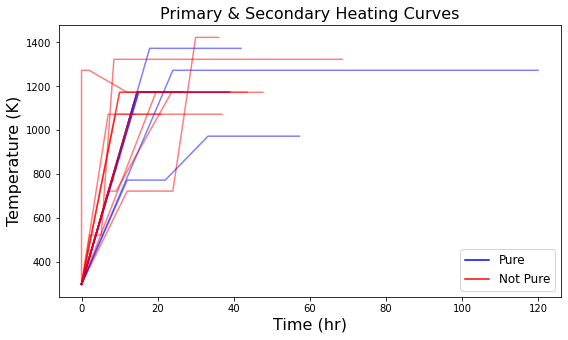

In [24]:
#plotting the temperature profile of each synthesis methods of golden standard
fig, ax = plt.subplots(ncols = 1, figsize = (9,5))

for i in range(0,df.shape[0]):

    #extracting primary temp
    temp1 = df['Primary Melt Temp'][i]
    
    #extracting ramp time to reach primary temp
    x1 = np.array([0, df['Primary Ramp Time'][i]])
    y1 = np.array([300, temp1])

    #extracting how long does the primary temp last
    x2 = np.array(x1[-1]+df['Primary Melt Time'][i]).reshape(-1)
    y2 = np.array(temp1).reshape(-1)
    
    #extracting secondary temp
    temp2 = df['Secondary Melt Temp'][i]
  
    #calculating the time it takes to reach the secondary temperatures 
    x3 = np.array([df['Primary Ramp Time'][i]+df['Primary Melt Time'][i]+df['Secondary Ramp Time'][i]])
    y3 = np.array([temp2])

    #extracting how long does the secondary temp last
    x4 = np.array(x3[-1]+df['Secondary Melt Time'][i]).reshape(-1)
    y4 = np.array(temp2).reshape(-1)

    #extracting the result of synthesis: pure phase or not
    if df['Pure Phase'][i] == 0:
        c = 'r'
        label = ''
    else:
        c = 'b'

    x = np.concatenate([x1, x2, x3, x4], axis=0)
    y = np.concatenate([y1, y2, y3, y4], axis=0)
    
    ax.plot(x, y,
            alpha = 0.5,
            c=c)

#plotting the profiles
ax.plot(0,300, label='Pure', c='b')
ax.plot(0,300, label='Not Pure', c='r')

ax.set_xlabel('Time (hr)', fontsize=16)
ax.set_ylabel('Temperature (K)', fontsize=16)
ax.set_title('Primary & Secondary Heating Curves', fontsize=16)
ax.legend(loc='lower right', fontsize=12)

In [4]:
#defining columns that are of interest 
columns = ['Primary Ramp Time','Primary Melt Temp','Primary Melt Time',
'Secondary Ramp Time', 'Secondary Melt Temp', 'Secondary Melt Time',
'Anneal Temp', 'Anneal Time','Cooling type',
'Densification Technique','Densification Time','Densification Temp','Densification Pressure',
'Post Annealing Temp','Post Annealing Time']
df1 = df[columns]

#data clearning 
df1 = df1.replace(0, np.nan)
df1 = df1.replace(298, np.nan)
df1 = df1.replace(300, np.nan)

#replacing descriptions with categorical numbers 
df1 = df1.replace('room cooling', 0)
df1 = df1.replace('furnace cooling', 1)
df1 = df1.replace('quenched', 2)

#replacing descriptions with categorical numbers 
df1 = df1.replace('NIL', 0)
df1 = df1.replace('Hot Press', 1)
df1 = df1.replace('Sintering', 2)

df1


,Primary Ramp Time,Primary Melt Temp,Primary Melt Time,Secondary Ramp Time,Secondary Melt Temp,Secondary Melt Time,Anneal Temp,Anneal Time,Cooling type,Densification Technique,Densification Time,Densification Temp,Densification Pressure,Post Annealing Temp,Post Annealing Time
0,NaN,1273.0,2.0,10.000,1173,12.0,923.0,168.0,0,1,60.0,823.00,70.0,773.0,120.0
1,NaN,NaN,NaN,10.000,1173,12.0,923.0,168.0,0,1,60.0,673.00,70.0,NaN,NaN
2,NaN,NaN,NaN,17.910,1373,24.0,663.0,24.0,0,0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,15.000,1173,24.0,873.0,24.0,2,1,15.0,748.15,90.0,NaN,NaN
4,NaN,NaN,NaN,15.000,1173,24.0,873.0,24.0,2,1,15.0,748.15,90.0,NaN,NaN
5,2.180,523.0,3.0,3.330,1323,60.0,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,9.583,873,0.5,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,8.940,1073,12.0,873.0,1.0,1,0,NaN,NaN,NaN,873.0,1.0
8,NaN,NaN,NaN,7.916,773,0.5,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,24.000,1273,96.0,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN


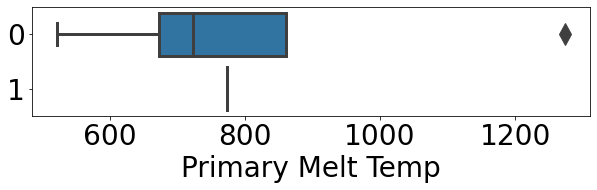

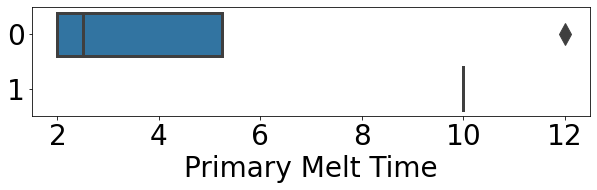

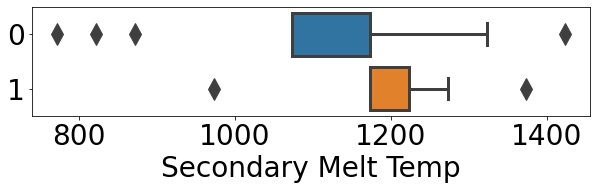

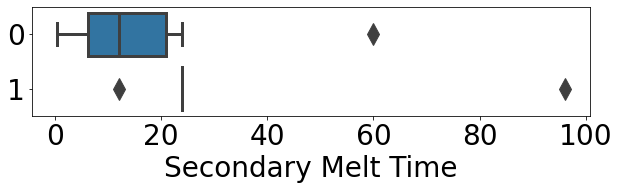

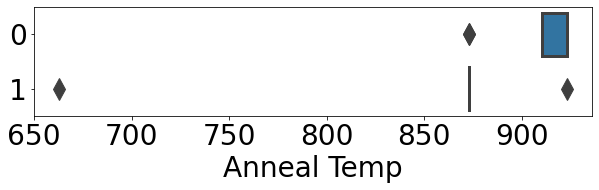

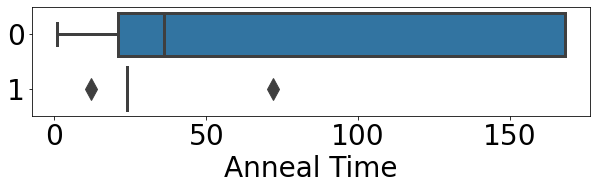

In [28]:
#overall boxplot of temperature profile's features against the result of the synthesis
for var in ['Primary Melt Temp','Primary Melt Time',
            'Secondary Melt Temp', 'Secondary Melt Time',
            'Anneal Temp', 'Anneal Time',]:
    
    f, ax = plt.subplots(1, 1, figsize=(10, 2))

    sb.boxplot(x = var, y = df['Pure Phase'], data=df1, orient = "h", ax = ax, linewidth=3, fliersize=15)
    
    
    ax.set_xlabel(xlabel=var, fontsize=28)
    ax.set_ylabel(ylabel='', fontsize=28)
    ax.tick_params(axis='both', labelsize=28)
    

In [99]:
#import libraries
from sklearn.model_selection import train_test_split
import xgboost
import shap

#defining features for X that would be the input to xgboost
X = df[['Primary Melt Temp','Primary Melt Time', 'Secondary Melt Temp', 'Secondary Melt Time',
'Anneal Temp', 'Anneal Time']]
y = df['Pure Phase']

#splitting of data randomly as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#defining the train matrix
d_train = xgboost.DMatrix(X_train, label=y_train)

#defining the test matrix
d_test = xgboost.DMatrix(X_test, label=y_test)

#definig the hyper-parameters that will be used in model training 
params = {
    #"eta": 0.01,
    "objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    "eval_metric": "logloss"
}

#training the model
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.52140
[27]	test-logloss:0.52321


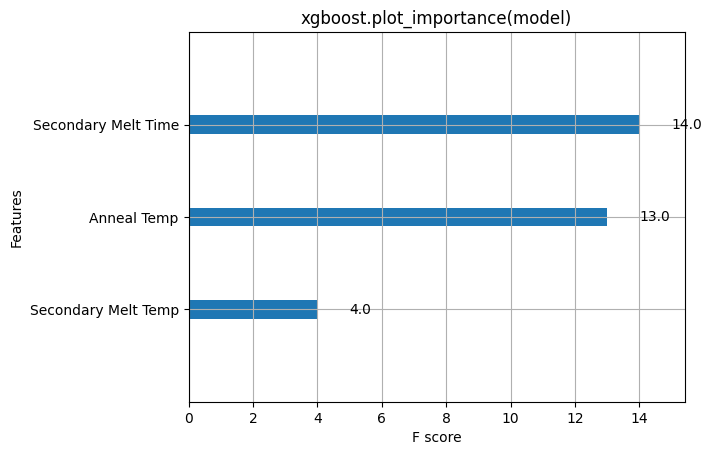

In [100]:
#plotting the feature importance
xgboost.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [101]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

[02:01:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


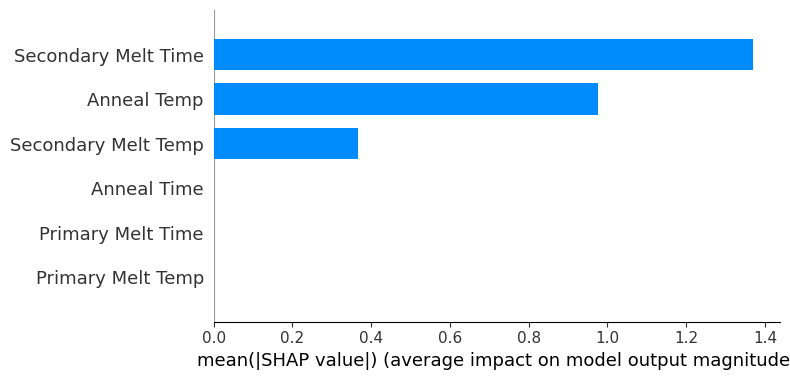

In [102]:
#plotting the summary of shap analysis
shap.summary_plot(shap_values, X_train.columns, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


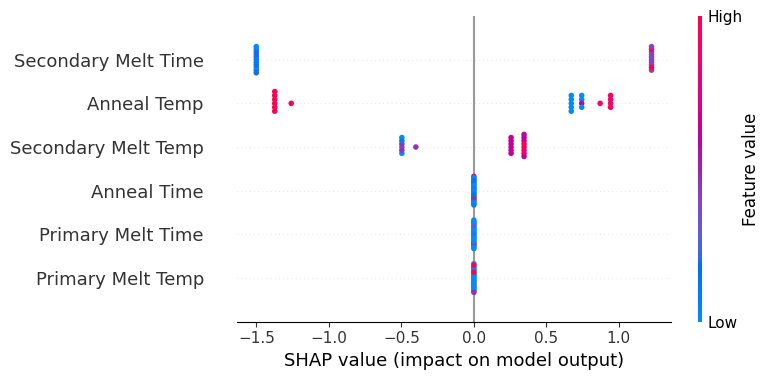

In [103]:
#plotting the summary of shap analysis
shap.summary_plot(shap_values, X)

Decision Tree Starts here

In [104]:
#selecting features for X & y for the model
df_numberic = df.select_dtypes(include=np.number)
col = list(df_numberic.columns)
X = df_numberic[col[:-1]]
y = df_numberic[col[-1]]

In [105]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [106]:
#random splitting of data set into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [107]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6



[Text(0.4, 0.8333333333333334, 'Secondary Ramp Time <= 10.625\ngini = 0.469\nsamples = 16\nvalue = [10, 6]\nclass = 0'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 0'),
 Text(0.6, 0.5, 'Anneal Temp <= 898.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = 1'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0')]

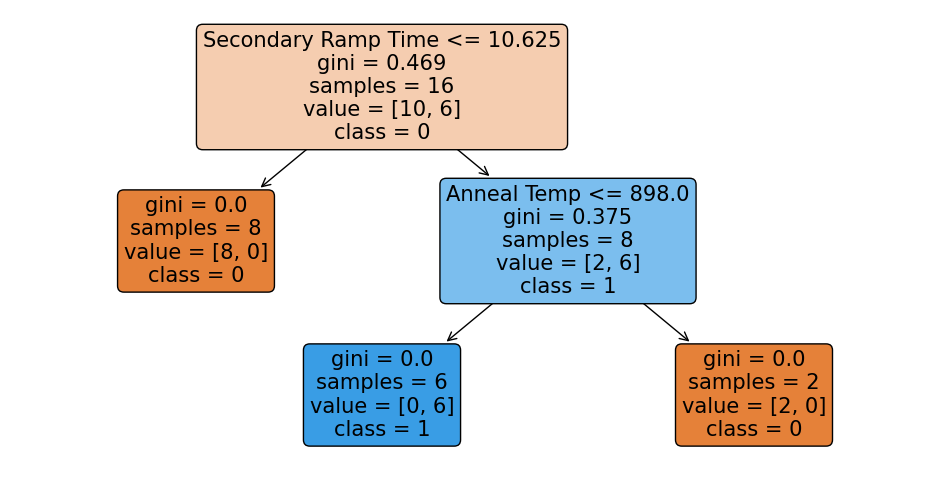

In [108]:
#plotting the decision tree
f = plt.figure(figsize=(12,6))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names= list(X.columns), 
          class_names=["0","1"])

<BarContainer object of 15 artists>

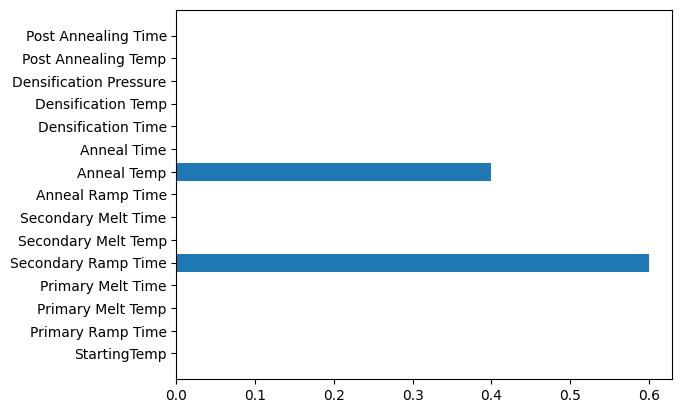

In [109]:
#plotting feature importance
plt.barh(X.columns,dectree.feature_importances_)

Limiting the columns to be the same as SS

In [123]:
#selecting features for X & y for the model
df_numberic = df.select_dtypes(include=np.number)
col = list(df_numberic.columns)
X = df_numberic[col[1:10]]
y = df_numberic[col[-1]]

In [128]:
#random splitting of data set into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 1.0



[Text(0.4444444444444444, 0.9, 'Secondary Ramp Time <= 10.625\ngini = 0.492\nsamples = 16\nvalue = [9, 7]\nclass = 0'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.5555555555555556, 0.7, 'Anneal Temp <= 898.0\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = 1'),
 Text(0.3333333333333333, 0.5, 'Secondary Melt Time <= 18.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = 1'),
 Text(0.2222222222222222, 0.3, 'Secondary Ramp Time <= 14.582\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 1'),
 Text(0.7777777777777778, 0.5, 'Anneal Time <= 60.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0

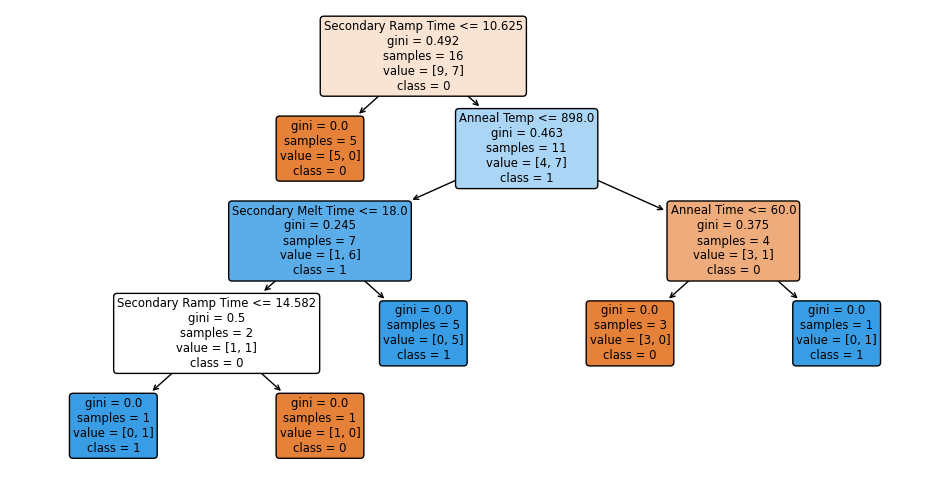

In [129]:
#plotting the decision tree
f = plt.figure(figsize=(12,6))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names= list(X.columns), 
          class_names=["0","1"])

<BarContainer object of 9 artists>

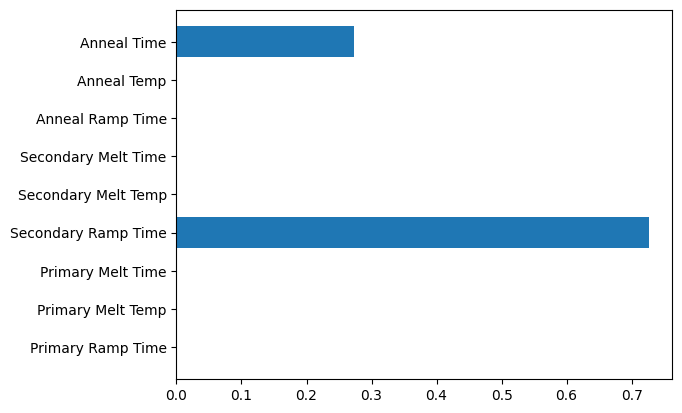

In [114]:
#plotting feature importance
plt.barh(X.columns,dectree.feature_importances_)

In [115]:
#importing and preparing data for leave one out model
from sklearn.model_selection import LeaveOneOut
columns = X.columns
X = np.array(X)
y = np.array(y)

In [118]:
#initialization
loo = LeaveOneOut()
feature_importance_mean_list = []

# running LOO 200 times
for i in range(200):

    #initialzing the model parameters for each round of LOO
    models = []
    predictions = []
    feature_importances = []
    train_score = []
    test_score = []
    
    #running LOO
    for train_index, test_index in loo.split(X):

        #splitting dataset into train & test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Decision tree settings and trainning
        clf = DecisionTreeClassifier(max_depth = 4)
        clf.fit(X_train, y_train)

        #append the model of LOO under one round
        models.append(clf)

        #predict and append the data
        y_pred = clf.predict(X_test)
        predictions.append(y_pred)

        #calculate feature importance and append the data
        fi = clf.feature_importances_
        feature_importances.append(fi)
        
        #testing the model on train & test dataset
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        #apending the scores
        train_score.append(clf.score(X_train, y_train))
        test_score.append(clf.score(X_test, y_test))
    
    #calculating the mean of training datasest score for each round of LOO model 
    train_score = np.array(train_score)
    mean_train_score = np.mean(train_score, axis=0)
    mean_train_score = np.round(mean_train_score, 2)

    print('Mean Train Score', mean_train_score)

    #calculating the mean of test datasest  score for each round of LOO model 
    test_score = np.array(test_score)
    mean_test_score = np.mean(test_score, axis=0)
    mean_test_score = np.round(mean_test_score, 2)

    print('Mean Test Score', mean_test_score)

    #calculating the mean of feature importance score for each round of LOO model 
    feature_importances = np.array(feature_importances)
    mean_feature_importances = np.mean(feature_importances, axis=0)
    mean_feature_importances = np.round(mean_feature_importances, 2)

    feature_importance_mean_list += [mean_feature_importances]

Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Score 0.76
Mean Train Score 1.0
Mean Test Sco

Text(0, 0.5, 'Features')

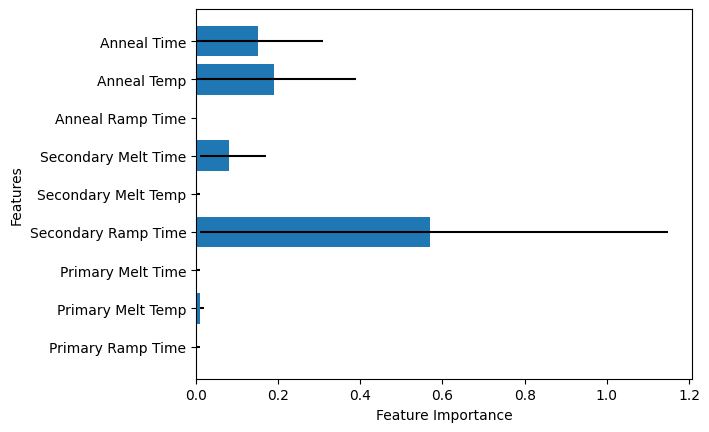

In [122]:
#the mean, max, min of feature importance is calculated for each of the features and plotted in graph
fi_list = []
fi_upper = []
fi_lower = []
for j in range(9):
    fi_list.append(np.mean(np.array([i[j] for i in feature_importance_mean_list])))
    fi_upper.append(max(np.array([i[j] for i in feature_importance_mean_list])))
    fi_lower.append(min(np.array([i[j] for i in feature_importance_mean_list])))
plt.barh(columns,mean_feature_importances, xerr = [fi_lower, fi_upper])
plt.xlabel('Feature Importance')
plt.ylabel('Features')